In [49]:
# Multilayer Perceptron (MLP) for multi-class softmax classification:

In [50]:
# Import the dependencies

%matplotlib inline
import matplotlib.pyplot as plt #For plot
import pandas as pd #For DataFrame
import numpy as np #For scientific computing

In [51]:
# Import Keras dependencies

import keras

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [52]:
batch_size = 256
num_classes = 26
epochs = 10

In [53]:
Emnist_file_path = "emnist/"

In [54]:
# Mapping file for ascii to alphabet mapping

mapping_file = Emnist_file_path + 'emnist-letters-mapping.txt'

In [55]:
# Reading the file into a list

with open(mapping_file, 'r') as fin: 
    mapping = fin.readlines() 

# Creating an ascii dictionary

ascii_map = {} 
for line in mapping: 
    char_class = int(line.split()[0]) 
    letter = chr(int(line.split()[1])) 
    ascii_map[char_class] = letter

print(ascii_map)    

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'}


In [56]:
All_train = Emnist_file_path + 'emnist-letters-train.csv'
All_test = Emnist_file_path + 'emnist-letters-test.csv'

In [57]:
All_train_data = pd.read_csv(All_train)
All_test_data = pd.read_csv(All_test)

In [58]:
All_training_data = All_train_data.values
All_testing_data = All_test_data.values

In [59]:
print(type(All_training_data))
print(type(All_testing_data))
print(All_training_data.shape)
print(All_testing_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(88799, 785)
(14799, 785)


In [60]:
x_train = All_training_data[:, 1:].astype('float32')
y_train = All_training_data[:, 0:1]
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)

x_train shape :  (88799, 784)
y_train shape :  (88799, 1)


In [61]:
x_test = All_testing_data[:, 1:].astype('float32')
y_test = All_testing_data[:, 0:1]
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_test shape :  (14799, 784)
y_test shape :  (14799, 1)


In [62]:
x_train = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_train)))
x_test = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_test)))

In [63]:
print(type(x_train))
print('x_train shape : ', x_train.shape)

<class 'numpy.ndarray'>
x_train shape :  (88799, 784)


In [64]:
print(type(x_test))
print('x_test shape : ', x_test.shape)

<class 'numpy.ndarray'>
x_test shape :  (14799, 784)


data  10567  :  [14]


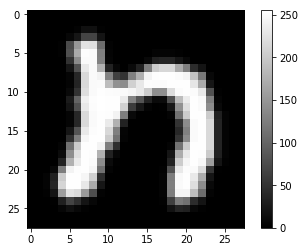

In [65]:
# Print the i data 

i = 10567
plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

In [66]:
# Scale from 0 to 255

x_train /= 255
x_test /= 255

In [67]:
# Make it 0 based indices

y_train = y_train - 1
y_test = y_test - 1

In [68]:
# Convert labels to categorical one-hot encoding

y_train = keras.utils.to_categorical(y_train, num_classes = num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes = num_classes)

In [69]:
# Define the Model Architecture # Define the model

# Dense(512) is a fully-connected layer with 4 hidden layers each having 512 hidden units or nodes.
# In the first layer, we have specified the expected input data shape tuple - (784,1).

model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [70]:
# summarize the model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
__________

In [71]:
# Compile the Model (optimizer can be 'adagrad' or rmsprop also)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# Summarize our model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
__________

In [73]:
# Calculate the Classification Accuracy on the Test Set (Before Training)

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]
print('Before Training - Test accuracy: %.4f%%' % accuracy)

Before Training - Test accuracy: 3.9327%


In [74]:
checkpointer = ModelCheckpoint(filepath='emnist.letters.dense.model.best.hdf5', verbose=3, save_best_only=True)

In [75]:
# Train the model, iterating on the data in batches of 256 samples with epochs 10

Trained_Model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=3, shuffle=True)

Train on 71039 samples, validate on 17760 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.50638, saving model to emnist.letters.dense.model.best.hdf5
Epoch 2/10

Epoch 00002: val_loss improved from 0.50638 to 0.40916, saving model to emnist.letters.dense.model.best.hdf5
Epoch 3/10

Epoch 00003: val_loss improved from 0.40916 to 0.35430, saving model to emnist.letters.dense.model.best.hdf5
Epoch 4/10

Epoch 00004: val_loss improved from 0.35430 to 0.34290, saving model to emnist.letters.dense.model.best.hdf5
Epoch 5/10

Epoch 00005: val_loss improved from 0.34290 to 0.31141, saving model to emnist.letters.dense.model.best.hdf5
Epoch 6/10

Epoch 00006: val_loss did not improve from 0.31141
Epoch 7/10

Epoch 00007: val_loss improved from 0.31141 to 0.30472, saving model to emnist.letters.dense.model.best.hdf5
Epoch 8/10

Epoch 00008: val_loss improved from 0.30472 to 0.30149, saving model to emnist.letters.dense.model.best.hdf5
Epoch 9/10

Epoch 00009: val_loss improved f

In [76]:
# Load the Model with the Best Classification Accuracy on the Validation Set

model.load_weights('emnist.letters.dense.model.best.hdf5')

In [77]:
# Save the best model

model.save('eminst_letters_dense_model.h5')

In [78]:
# Evaluate test accuracy

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]
loss = 100*score[0]

print('Test accuracy: %.4f%%' % accuracy)
print('Test loss: %.4f%%' % loss)

Test accuracy: 89.4385%
Test loss: 32.9096%


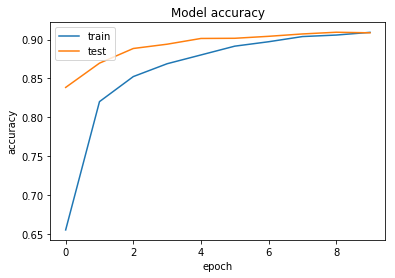

In [79]:
# summarize history for accuracy
plt.plot(Trained_Model.history['acc'])
plt.plot(Trained_Model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

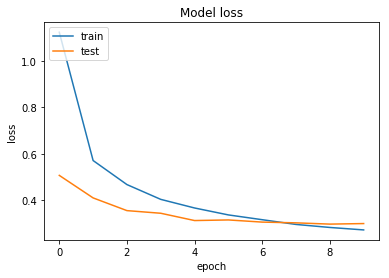

In [80]:
# summarize history for loss
plt.plot(Trained_Model.history['loss'])
plt.plot(Trained_Model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making Predictions
We can use our trained model to make predictions using model.predict

In [81]:
test = np.expand_dims(x_train[i], axis=0)
test.shape

(1, 784)

data  10567  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


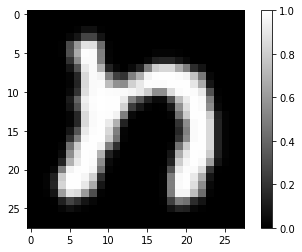

In [82]:
# Print the i data 
plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

In [83]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Predicted class: [15]


In [84]:
filepath = "uploads/G2.png"

In [85]:
# Load the image
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, grayscale=True)
im

C:\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [86]:
# Convert the image to a numpy array 
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [87]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

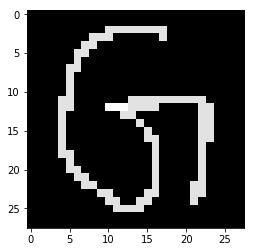

In [88]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

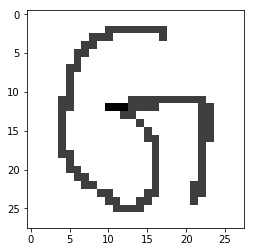

In [89]:
# # Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [90]:
# Make predictions

print(f"One-Hot-Encoded Prediction: {model.predict(img).round()}")
print(f"Predicted class: {model.predict_classes(img)+1}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Predicted class: [7]


In [91]:
x = model.predict_classes(img)+1

In [92]:
ascii_map[x[0]]

'G'